In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_excel('projectw.xlsx')
df.head()

,Date/Time,Humidity,Temperature
0,"October 19, 2023 at 06:44PM",84,28.5
1,"October 19, 2023 at 06:45PM",84,28.5
2,"October 19, 2023 at 06:46PM",84,28.9
3,"October 19, 2023 at 06:47PM",84,28.9
4,"October 19, 2023 at 06:48PM",84,28.9


## Data Preprocessing

In [3]:

df.columns = ['date', 'humidity', 'temperature']
df.head()

,date,humidity,temperature
0,"October 19, 2023 at 06:44PM",84,28.5
1,"October 19, 2023 at 06:45PM",84,28.5
2,"October 19, 2023 at 06:46PM",84,28.9
3,"October 19, 2023 at 06:47PM",84,28.9
4,"October 19, 2023 at 06:48PM",84,28.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18536 entries, 0 to 18535
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         18536 non-null  object 
 1   humidity     18536 non-null  int64  
 2   temperature  18536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 434.6+ KB


In [5]:
df.date.duplicated().sum()

1198

In [6]:
df[df.date.duplicated()].sample(10)

,date,humidity,temperature
14188,"November 11, 2023 at 01:18PM",69,31.299999
14710,"November 11, 2023 at 09:59PM",96,27.100000
14583,"November 11, 2023 at 07:52PM",98,27.100000
14220,"November 11, 2023 at 01:50PM",63,31.799999
14264,"November 11, 2023 at 02:34PM",67,32.299999
14141,"November 11, 2023 at 12:31PM",71,30.200001
14472,"November 11, 2023 at 06:02PM",75,28.900000
14487,"November 11, 2023 at 06:17PM",78,28.500000
14089,"November 11, 2023 at 11:39AM",84,29.299999
5409,"October 25, 2023 at 09:25PM",93,24.799999


In [7]:
df[df.date.str.contains('November 11, 2023 at 05:37PM')]

,date,humidity,temperature
13449,"November 11, 2023 at 05:37PM",69,30.200001
14447,"November 11, 2023 at 05:37PM",69,32.299999


In [8]:
df.drop_duplicates(subset='date', inplace=True)

In [9]:
df.index.duplicated().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(17338, 3)

In [12]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Ibk\AppData\Local\Temp\ipykernel_12748\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [13]:
df.set_index('date', inplace=True)

In [14]:
df

,humidity,temperature
date,,
2023-10-19 18:44:00,84,28.500000
2023-10-19 18:45:00,84,28.500000
2023-10-19 18:46:00,84,28.900000
2023-10-19 18:47:00,84,28.900000
2023-10-19 18:48:00,84,28.900000
...,...,...
2023-11-23 16:08:00,53,31.799999
2023-11-23 16:09:00,53,32.299999
2023-11-23 16:10:00,52,32.799999


In [15]:
17338/60

288.96666666666664

In [16]:
hourly = df.resample('H').mean()
hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 839 entries, 2023-10-19 18:00:00 to 2023-11-23 16:00:00
Freq: H
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   humidity     348 non-null    float64
 1   temperature  348 non-null    float64
dtypes: float64(2)
memory usage: 19.7 KB


<Axes: xlabel='date'>

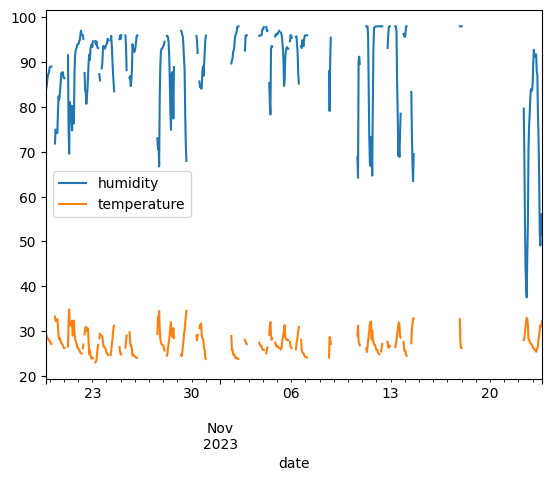

In [17]:
hourly.plot()

<Axes: xlabel='date'>

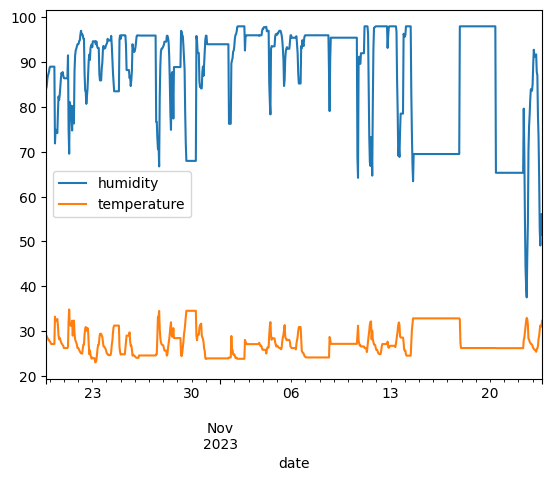

In [18]:
hourly = hourly.ffill()
hourly.plot()

In [19]:
humidity = hourly['humidity']
humidity.head()

date
2023-10-19 18:00:00    84.000000
2023-10-19 19:00:00    84.616667
2023-10-19 20:00:00    86.083333
2023-10-19 21:00:00    87.000000
2023-10-19 22:00:00    87.366667
Freq: H, Name: humidity, dtype: float64

In [20]:
temperature = hourly['temperature']
temperature.head()

date
2023-10-19 18:00:00    28.850000
2023-10-19 19:00:00    28.900000
2023-10-19 20:00:00    28.506667
2023-10-19 21:00:00    28.345000
2023-10-19 22:00:00    28.001667
Freq: H, Name: temperature, dtype: float64

<Axes: xlabel='date'>

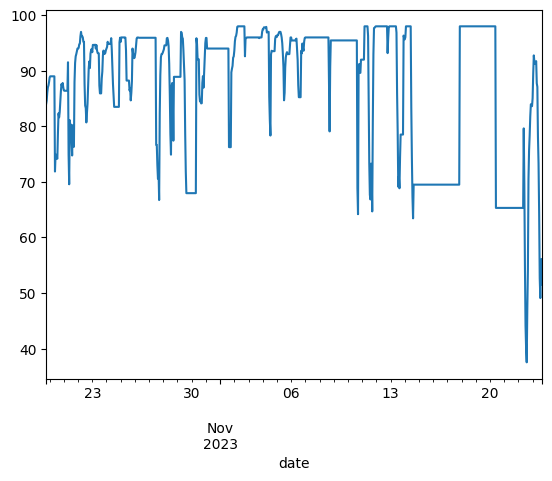

In [21]:
humidity.plot()

In [22]:
humidity['2023-11']

date
2023-11-01 00:00:00    94.000000
2023-11-01 01:00:00    94.000000
2023-11-01 02:00:00    94.000000
2023-11-01 03:00:00    94.000000
2023-11-01 04:00:00    94.000000
                         ...    
2023-11-23 12:00:00    52.677966
2023-11-23 13:00:00    49.083333
2023-11-23 14:00:00    54.483333
2023-11-23 15:00:00    56.116667
2023-11-23 16:00:00    51.555556
Freq: H, Name: humidity, Length: 545, dtype: float64

## Splitting the Data

In [23]:
train_humidity = humidity.loc[:'2023-11-22 23:59:59']
train_humidity

date
2023-10-19 18:00:00    84.000000
2023-10-19 19:00:00    84.616667
2023-10-19 20:00:00    86.083333
2023-10-19 21:00:00    87.000000
2023-10-19 22:00:00    87.366667
                         ...    
2023-11-22 19:00:00    78.350000
2023-11-22 20:00:00    81.769231
2023-11-22 21:00:00    83.966667
2023-11-22 22:00:00    83.896552
2023-11-22 23:00:00    83.620690
Freq: H, Name: humidity, Length: 822, dtype: float64

In [24]:
test_humidity = humidity.loc['2023-11-23 00:00:00':]
test_humidity.head()

date
2023-11-23 00:00:00    85.086207
2023-11-23 01:00:00    89.509091
2023-11-23 02:00:00    92.766667
2023-11-23 03:00:00    91.583333
2023-11-23 04:00:00    91.250000
Freq: H, Name: humidity, dtype: float64

In [25]:
len(train_humidity) + len(test_humidity) == len(humidity)

True

In [26]:
# Splitting the temperature data into train and test 
train_temperature = temperature.loc[:'2023-11-22 23:59:59']
test_temperature = humidity.loc['2023-11-23 00:00:00':]
test_temperature.head()
len(train_temperature) + len(test_temperature) == len(temperature)


True

# Humidity Time Series Analysis

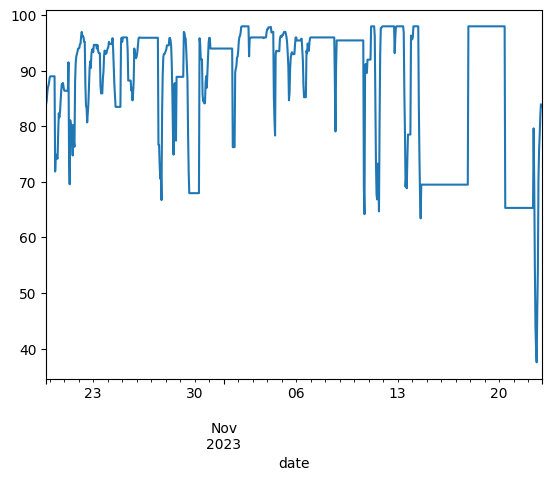

In [27]:
train_humidity.plot();

### Checking for stationary
### Determining the order of AR and MA


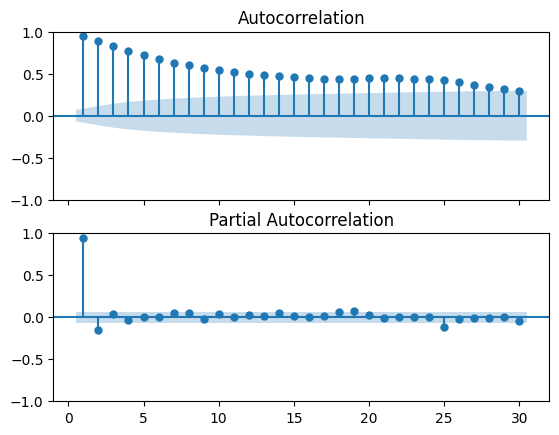

In [28]:
fig, ax = plt.subplots(2, 1, sharex=True)
plot_acf(train_humidity, zero=False, lags=30, ax=ax[0]);
plot_pacf(train_humidity, zero=False, ax=ax[1]);

In [29]:
train_humidity.shape
temperature[:822]

date
2023-10-19 18:00:00    28.850000
2023-10-19 19:00:00    28.900000
2023-10-19 20:00:00    28.506667
2023-10-19 21:00:00    28.345000
2023-10-19 22:00:00    28.001667
                         ...    
2023-11-22 19:00:00    27.593334
2023-11-22 20:00:00    27.361539
2023-11-22 21:00:00    27.125000
2023-11-22 22:00:00    27.093104
2023-11-22 23:00:00    26.898276
Freq: H, Name: temperature, Length: 822, dtype: float64

In [30]:
model_hum = ARIMA(train_humidity, order=(2, 0, 0))
results = model_hum.fit()
results

In [31]:
import joblib

In [32]:
from statsmodels.tsa.arima.model import ARIMAResults

In [33]:
joblib.dump(results, 'humidity_model.joblib')

['humidity_model.joblib']

In [34]:
residuals = results.resid
residuals

date
2023-10-19 18:00:00   -3.679980
2023-10-19 19:00:00    0.425856
2023-10-19 20:00:00    1.185656
2023-10-19 21:00:00    0.589772
2023-10-19 22:00:00    0.181440
                         ...   
2023-11-22 19:00:00    1.119945
2023-11-22 20:00:00    2.440957
2023-11-22 21:00:00    1.303997
2023-11-22 22:00:00   -0.639179
2023-11-22 23:00:00   -0.491896
Freq: H, Length: 822, dtype: float64

In [35]:
mean_absolute_error = np.mean(np.abs(residuals))
mean_absolute_error

1.6604123152397856

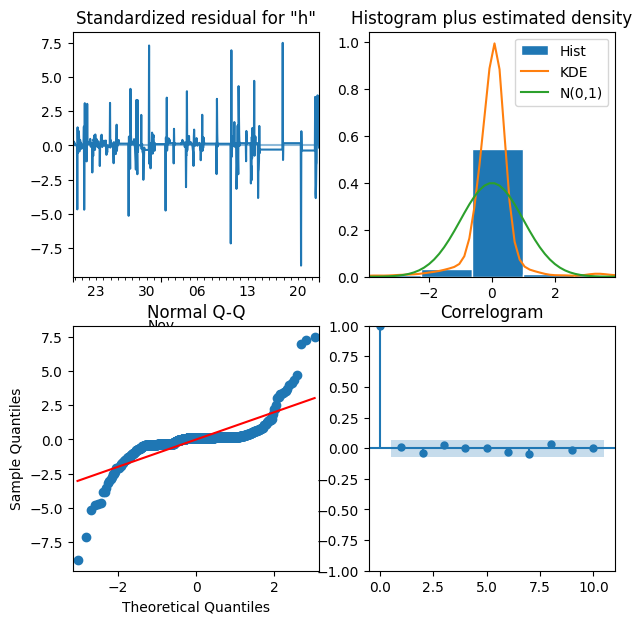

In [36]:
results.plot_diagnostics(figsize=(7,7));

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               humidity   No. Observations:                  822
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2231.994
Date:                Wed, 13 Dec 2023   AIC                           4471.989
Time:                        02:13:48   BIC                           4490.836
Sample:                    10-19-2023   HQIC                          4479.219
                         - 11-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.6800      2.707     32.396      0.000      82.375      92.985
ar.L1          1.0975      0.026     42.531      0.000       1.047       1.148
ar.L2         -0.1575      0.025     -6.230      0.000      -0.207      -0.108
sigma2        13.3294      0.286     46.557      0.000      12.768      13.891
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             21522.10
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.03
Prob(H) (two-sided):                  0.12   Kurtosis:                        28.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
forecast = results.get_prediction(start=-800)
mean_forcast = forecast.predicted_mean
mean_forcast.head()

date
2023-10-20 16:00:00    83.213517
2023-10-20 17:00:00    81.867679
2023-10-20 18:00:00    83.023233
2023-10-20 19:00:00    85.032030
2023-10-20 20:00:00    86.679445
Freq: H, Name: predicted_mean, dtype: float64

In [39]:
confidence_intervals = forecast.conf_int()
confidence_intervals.head()

,lower humidity,upper humidity
date,,
2023-10-20 16:00:00,76.057787,90.369247
2023-10-20 17:00:00,74.711949,89.023409
2023-10-20 18:00:00,75.867503,90.178963
2023-10-20 19:00:00,77.876300,92.187760
2023-10-20 20:00:00,79.523715,93.835175


In [40]:
lower_limit = confidence_intervals['lower humidity']
upper_limit= confidence_intervals['upper humidity']
date = confidence_intervals.index


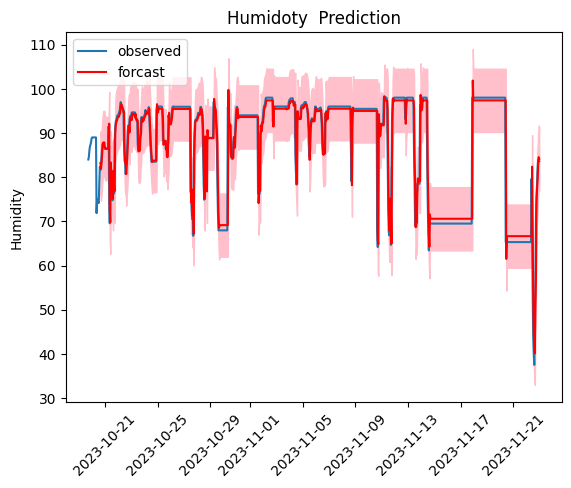

In [41]:
plt.plot(train_humidity.index, train_humidity, label='observed')
plt.plot(mean_forcast.index, mean_forcast.values, color='red', label='forcast')
plt.fill_between(date, lower_limit, upper_limit, color='pink' )
plt.xticks(rotation=45)
plt.title('Humidoty  Prediction')
plt.ylabel('Humidity')
plt.legend();

# Time series analysis for Temperature

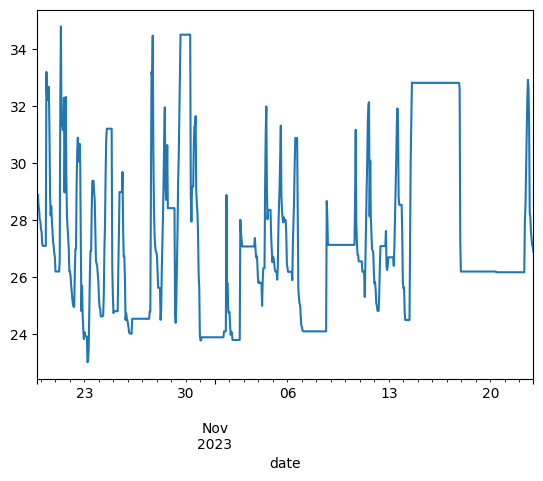

In [42]:
train_temperature.plot();

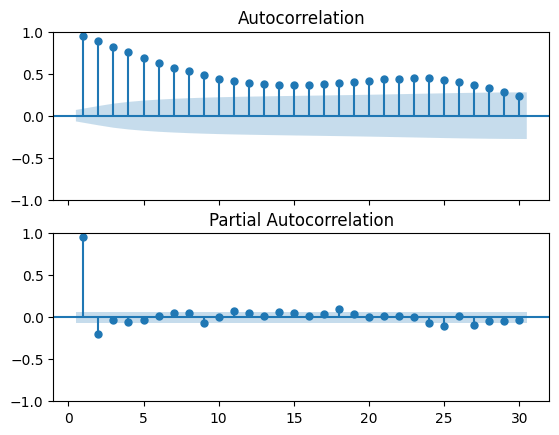

In [43]:
fig, ax = plt.subplots(2, 1, sharex=True)
plot_acf(train_temperature, zero=False, lags=30, ax=ax[0]);
plot_pacf(train_temperature, zero=False, ax=ax[1]);

In [44]:
model_temp = ARIMA(train_temperature, order=(2, 0, 0))
results_temp = model_temp.fit()
results_temp.resid[:5]

date
2023-10-19 18:00:00    1.404561
2023-10-19 19:00:00    0.116634
2023-10-19 20:00:00   -0.320433
2023-10-19 21:00:00   -0.020431
2023-10-19 22:00:00   -0.258797
Freq: H, dtype: float64

In [45]:
joblib.dump(results_temp, 'temperature_model.joblib')

['temperature_model.joblib']

In [46]:
mean_absolute_error_temp = np.mean(np.abs(results_temp.resid))
mean_absolute_error_temp

0.43416470932371076

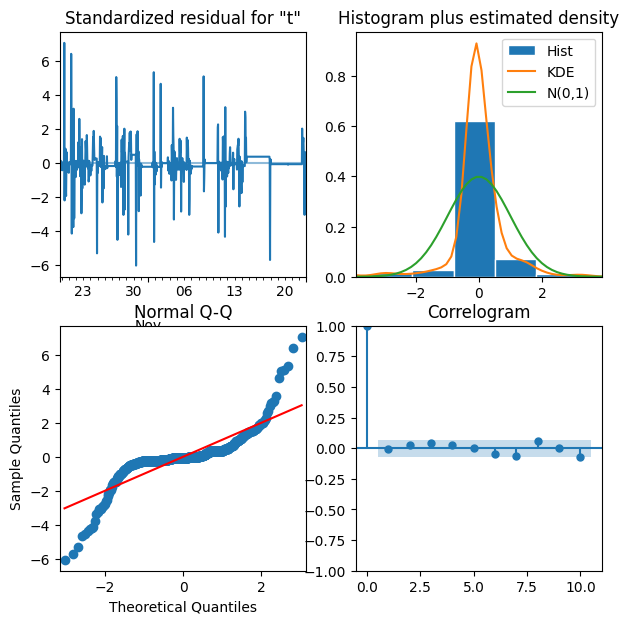

In [47]:
results_temp.plot_diagnostics(figsize=(7,7));


In [48]:
results_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            temperature   No. Observations:                  822
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1046.219
Date:                Wed, 13 Dec 2023   AIC                           2100.438
Time:                        02:13:53   BIC                           2119.285
Sample:                    10-19-2023   HQIC                          2107.669
                         - 11-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4454      0.670     40.954      0.000      26.132      28.759
ar.L1          1.1477      0.023     50.431      0.000       1.103       1.192
ar.L2         -0.2049      0.020    -10.496      0.000      -0.243      -0.167
sigma2         0.7443      0.020     37.343      0.000       0.705       0.783
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              7182.27
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

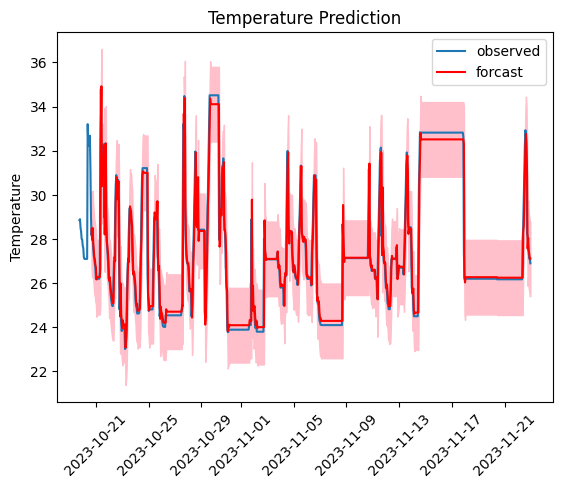

In [49]:
forecast_temp = results_temp.get_prediction(start=-800)
mean_forcast_temp = forecast_temp.predicted_mean

confidence_intervals_temp = forecast_temp.conf_int()



lower_limit_temp = confidence_intervals_temp['lower temperature']
upper_limit_temp= confidence_intervals_temp['upper temperature']


plt.plot(train_temperature.index, train_temperature, label='observed')
plt.plot(mean_forcast_temp.index, mean_forcast_temp.values, color='red', label='forcast')
plt.fill_between(confidence_intervals_temp.index, lower_limit_temp, upper_limit_temp, color='pink' )
plt.xticks(rotation=45)
plt.title('Temperature Prediction')
plt.ylabel('Temperature')
plt.legend();

In [50]:
# results.get_forecast(steps=100).predicted_mean

In [51]:
# test_mean =results_temp.get_forecast(steps=17).predicted_mean

In [52]:
# plt.plot(test_temperature.index, test_temperature, label='observed')
# plt.plot(test_mean.index, test_mean.values, color='red', label='forcast')
# #plt.fill_between(confidence_intervals_temp.index, lower_limit_temp, upper_limit_temp, color='pink' )
# plt.xticks(rotation=45)
# plt.title('Temperature Prediction')
# plt.ylabel('Temperature')
# plt.legend();

In [53]:
forecast_temp = results_temp.get_prediction(start=-800)
mean_forcast_temp = forecast_temp.predicted_mean
mean_forcast_temp

date
2023-10-20 16:00:00    28.451581
2023-10-20 17:00:00    27.960263
2023-10-20 18:00:00    28.499672
2023-10-20 19:00:00    27.895933
2023-10-20 20:00:00    27.571052
                         ...    
2023-11-22 19:00:00    28.048682
2023-11-22 20:00:00    27.477962
2023-11-22 21:00:00    27.318850
2023-11-22 22:00:00    27.094861
2023-11-22 23:00:00    27.106709
Freq: H, Name: predicted_mean, Length: 800, dtype: float64

In [54]:
import streamlit as st
import joblib 

humidity_model.forecast(start='2023-11-19 00:00:00', end='2023-11-19 01:00:00')

TypeError: statsmodels.tsa.statespace.mlemodel.MLEResults.predict() got multiple values for keyword argument 'start'

In [55]:
import datetime
datetime.datetime.now()

datetime.datetime(2023, 12, 13, 0, 30, 55, 284296)

In [54]:
humidity

date
2023-10-19 18:00:00    84.000000
2023-10-19 19:00:00    84.616667
2023-10-19 20:00:00    86.083333
2023-10-19 21:00:00    87.000000
2023-10-19 22:00:00    87.366667
                         ...    
2023-11-23 12:00:00    52.677966
2023-11-23 13:00:00    49.083333
2023-11-23 14:00:00    54.483333
2023-11-23 15:00:00    56.116667
2023-11-23 16:00:00    51.555556
Freq: H, Name: humidity, Length: 839, dtype: float64

In [64]:
import joblib
import datetime
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
import streamlit as st

humidity_model = joblib.load('humidity_model.joblib')
temperature_model = joblib.load('temperature_model.joblib')
def make_prediction(model):
    if st.button('Predict current humidity'):
        last_training_time = datetime.datetime(2023, 11, 22, 23, 00,00)
        current_time = datetime.datetime.now()
        hour_diff = int((current_time - last_training_time).total_seconds() /3600)

        forecast = model.get_forecast(steps=hour_diff+1)
        prediction = forecast.predicted_mean.tail(2)
        st.write(f'Current humidity: {int(prediction[0])}\nNext hour: {int(prediction[1])}')
    #return prediction

make_prediction(humidity_model)
make_prediction(temperature_model)



In [62]:
make_prediction(humidity_model)

In [219]:
last_training_time = datetime.datetime(2023, 11, 22, 23, 00,00)
current_time = datetime.datetime.now()
hour_diff = int((current_time - last_training_time).total_seconds() /3600)

forecast = humidity_model.get_forecast(steps=hour_diff+1)
prediction = forecast.predicted_mean.tail(2)
prediction

2023-12-13 02:00:00    87.67998
2023-12-13 03:00:00    87.67998
Freq: H, Name: predicted_mean, dtype: float64

In [56]:
st.button

<bound method ButtonMixin.button of DeltaGenerator()>

In [218]:
humidity_prediction = make_prediction(humidity_model)
humidity_prediction

In [170]:
hour_diff

482

In [ ]:
last_training_time = datetime.datetime(2023, 11, 22, 23, 00,00)
current_time = datetime.datetime.now()
hour_diff = int((current_time - last_training_time).total_seconds() /3600)

Current humidity: 87
Next hour: 87


In [154]:
forecast.predicted_mean.loc['2023']

2023-11-23 00:00:00    83.820867
2023-11-23 01:00:00    84.084026
2023-11-23 02:00:00    84.341313
2023-11-23 03:00:00    84.582233
2023-11-23 04:00:00    84.806114
                         ...    
2023-12-12 22:00:00    87.679980
2023-12-12 23:00:00    87.679980
2023-12-13 00:00:00    87.679980
2023-12-13 01:00:00    87.679980
2023-12-13 02:00:00    87.679980
Freq: H, Name: predicted_mean, Length: 483, dtype: float64

In [58]:
humidity_model.get_forecast?

Signature: humidity_model.get_forecast(steps=1, signal_only=False, **kwargs)
Docstring:
Out-of-sample forecasts and prediction intervals

Parameters
----------
steps : int, str, or datetime, optional
    If an integer, the number of steps to forecast from the end of the
    sample. Can also be a date string to parse or a datetime type.
    However, if the dates index does not have a fixed frequency, steps
    must be an integer. Default is 1.
signal_only : bool, optional
    Whether to compute forecasts of only the "signal" component of
    the observation equation. Default is False. For example, the
    observation equation of a time-invariant model is
    :math:`y_t = d + Z \alpha_t + \varepsilon_t`, and the "signal"
    component is then :math:`Z \alpha_t`. If this argument is set to
    True, then forecasts of the "signal" :math:`Z \alpha_t` will be
    returned. Otherwise, the default is for forecasts of :math:`y_t`
    to be returned.
**kwargs
    Additional arguments may require

In [147]:
humidity_model.forecasts
humidity_model.forecast(steps=0)

ValueError: Prediction must have `end` after `start`.

In [106]:
humidity.describe()

count    839.000000
mean      87.442983
std       11.957556
min       37.516667
25%       79.355620
50%       93.933333
75%       96.000000
max       98.000000
Name: humidity, dtype: float64